In [1]:
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()

Creating new folder /root/.dipy/sherbrooke_3shell
Files successfully downloaded to /root/.dipy/sherbrooke_3shell


({'HARDI193.bval': ('https://dl.dropboxusercontent.com/u/2481924/sherbrooke_data/3shells-1000-2000-3500-N193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://dl.dropboxusercontent.com/u/2481924/sherbrooke_data/3shells-1000-2000-3500-N193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7'),
  'HARDI193.nii.gz': ('https://dl.dropboxusercontent.com/u/2481924/sherbrooke_data/3shells-1000-2000-3500-N193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66')},
 '/root/.dipy/sherbrooke_3shell')

In [2]:
from os.path import expanduser, join
home = expanduser('~')

In [3]:
dname = join(home, '.dipy', 'sherbrooke_3shell')

In [4]:
fdwi = join(dname, 'HARDI193.nii.gz')

print(fdwi)

fbval = join(dname, 'HARDI193.bval')

print(fbval)

fbvec = join(dname, 'HARDI193.bvec')

print(fbvec)

/root/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/root/.dipy/sherbrooke_3shell/HARDI193.bval
/root/.dipy/sherbrooke_3shell/HARDI193.bvec


In [5]:
import nibabel as nib
img = nib.load(fdwi)
data = img.get_data()

In [6]:
print(data.shape)

(128, 128, 60, 193)


In [7]:
print(img.get_header().get_zooms()[:3])

(2.0, 2.0, 2.0)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


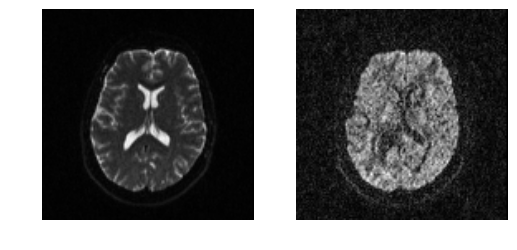

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

axial_middle = data.shape[2] / 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()

In [9]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [10]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

In [11]:
print(gtab.info)

B-values shape (193,)
         min 0.000000 
         max 3500.000000 
B-vectors shape (193, 3)
         min -0.964050 
         max 0.999992 
None


In [12]:
print(gtab.bvals)

[    0.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  3500.
  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
  3500

In [13]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


In [14]:
S0s = data[:, :, :, gtab.b0s_mask]

In [15]:
print(S0s.shape)

(128, 128, 60, 1)


In [16]:
nib.save(nib.Nifti1Image(S0s, img.get_affine()), 'HARDI193_S0.nii.gz')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [17]:
import numpy as np
import nibabel as nib
import dipy.reconst.dti as dti
from dipy.data import fetch_stanford_hardi
fetch_stanford_hardi()

Dataset is already in place. If you want to fetch it again please first remove the folder /root/.dipy/stanford_hardi 


({'HARDI150.bval': ('https://stacks.stanford.edu/file/druid:yx282xq2090/dwi.bvals',
   '4e08ee9e2b1d2ec3fddb68c70ae23c36'),
  'HARDI150.bvec': ('https://stacks.stanford.edu/file/druid:yx282xq2090/dwi.bvecs',
   '4c63a586f29afc6a48a5809524a76cb4'),
  'HARDI150.nii.gz': ('https://stacks.stanford.edu/file/druid:yx282xq2090/dwi.nii.gz',
   '0b18513b46132b4d1051ed3364f2acbc')},
 '/root/.dipy/stanford_hardi')

In [18]:
from dipy.data import read_stanford_hardi

img, gtab = read_stanford_hardi()

Dataset is already in place. If you want to fetch it again please first remove the folder /root/.dipy/stanford_hardi 


In [19]:
data = img.get_data()
print('data.shape (%d, %d, %d, %d)' % data.shape)

data.shape (81, 106, 76, 160)


In [20]:
from dipy.segment.mask import median_otsu

maskdata, mask = median_otsu(data, 3, 1, True,
                             vol_idx=range(10, 50), dilate=2)
print('maskdata.shape (%d, %d, %d, %d)' % maskdata.shape)

/usr/local/lib/python2.7/dist-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


maskdata.shape (71, 87, 62, 160)


In [21]:
tenmodel = dti.TensorModel(gtab)

In [22]:
tenfit = tenmodel.fit(maskdata)

In [23]:
print('Computing anisotropy measures (FA, MD, RGB)')
from dipy.reconst.dti import fractional_anisotropy, color_fa, lower_triangular

FA = fractional_anisotropy(tenfit.evals)

Computing anisotropy measures (FA, MD, RGB)


In [24]:
FA[np.isnan(FA)] = 0

In [25]:
fa_img = nib.Nifti1Image(FA.astype(np.float32), img.get_affine())
nib.save(fa_img, 'tensor_fa.nii.gz')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [26]:
evecs_img = nib.Nifti1Image(tenfit.evecs.astype(np.float32), img.get_affine())
nib.save(evecs_img, 'tensor_evecs.nii.gz')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [27]:
MD1 = dti.mean_diffusivity(tenfit.evals)
nib.save(nib.Nifti1Image(MD1.astype(np.float32), img.get_affine()), 'tensors_md.nii.gz')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  from ipykernel import kernelapp as app


In [28]:
MD2 = tenfit.md

The FA is the normalized variance of the eigen-values of the tensor

$FA = \sqrt{\frac{1}{2}\frac{(\lambda_1-\lambda_2)^2+(\lambda_1-
            \lambda_3)^2+(\lambda_2-\lambda_3)^2}{\lambda_1^2+
            \lambda_2^2+\lambda_3^2}}$

In [29]:
FA = np.clip(FA, 0, 1)
RGB = color_fa(FA, tenfit.evecs)
nib.save(nib.Nifti1Image(np.array(255 * RGB, 'uint8'), img.get_affine()), 'tensor_rgb.nii.gz')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  app.launch_new_instance()


In [30]:
print('Computing tensor ellipsoids in a part of the splenium of the CC')

from dipy.data import get_sphere
sphere = get_sphere('symmetric724')

from dipy.viz import fvtk
ren = fvtk.ren()

evals = tenfit.evals[13:43, 44:74, 28:29]
evecs = tenfit.evecs[13:43, 44:74, 28:29]

Computing tensor ellipsoids in a part of the splenium of the CC


In [ ]:
cfa = RGB[13:43, 44:74, 28:29]
cfa /= cfa.max()

fvtk.add(ren, fvtk.tensor(evals, evecs, cfa, sphere))
fvtk.show(ren)

![](http://nipy.org/dipy/_images/tensor_ellipsoids.png)

Tensor elliptoids normalized to increase contrast

In [ ]:
fvtk.clear(ren)

In [ ]:
tensor_odfs = tenmodel.fit(data[20:50, 55:85, 38:39]).odf(sphere)

fvtk.add(ren, fvtk.sphere_funcs(tensor_odfs, sphere, colormap=None))
fvtk.show(ren)

![](http://nipy.org/dipy/_images/tensor_odfs.png)

tensor orientation distribution functions